In [1]:
#  Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
#  Loading Dataset
df = pd.read_csv("owid-covid-data.csv")

#  Checking columns and a preview to show the first few columns
print("Dataset shape:", df.shape)
print("\nColumns:\n", df.columns)
df.head()


Dataset shape: (302512, 67)

Columns:
 Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations',

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN                  37.746                         0.5   
1           NaN                  37.746                         0.5   
2           NaN                  37.746                         0.5   
3           NaN                  37.746                         0.5   
4           NaN                  37.746                         0.5   

   life_expectancy  human_development_index  population  \
0            64.83                    0.511  41128772.0   
1            64.83                    0.511  41128772.0   
2            64.83                    0.511  41128772.0   
3            64.83                    0.511  41128772.0   
4            64.83                    0.511  41128772.0   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

In [3]:
#  Data Cleaning

# Select important columns
columns = ['iso_code', 'continent', 'location', 'date',
           'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
           'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
           'population']
df = df[columns]

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter countries of interest
countries = ['Kenya', 'United States', 'India', 'Brazil', 'South Africa']
df = df[df['location'].isin(countries)]

# Fill missing numeric values with 0
df.fillna(0, inplace=True)

df.head()


iso_code      continent location       date  total_cases  new_cases  \
35882      BRA  South America   Brazil 2020-01-03          0.0        0.0   
35883      BRA  South America   Brazil 2020-01-04          0.0        0.0   
35884      BRA  South America   Brazil 2020-01-05          0.0        0.0   
35885      BRA  South America   Brazil 2020-01-06          0.0        0.0   
35886      BRA  South America   Brazil 2020-01-07          0.0        0.0   

       total_deaths  new_deaths  total_vaccinations  people_vaccinated  \
35882           0.0         0.0                 0.0                0.0   
35883           0.0         0.0                 0.0                0.0   
35884           0.0         0.0                 0.0                0.0   
35885           0.0         0.0                 0.0                0.0   
35886           0.0         0.0                 0.0                0.0   

       people_fully_vaccinated   population  
35882                      0.0  215313504.0  
35883                      0.0  215313504.0  
35884                      0.0  215313504.0  
35885                      0.0  215313504.0  
35886                      0.0  215313504.0

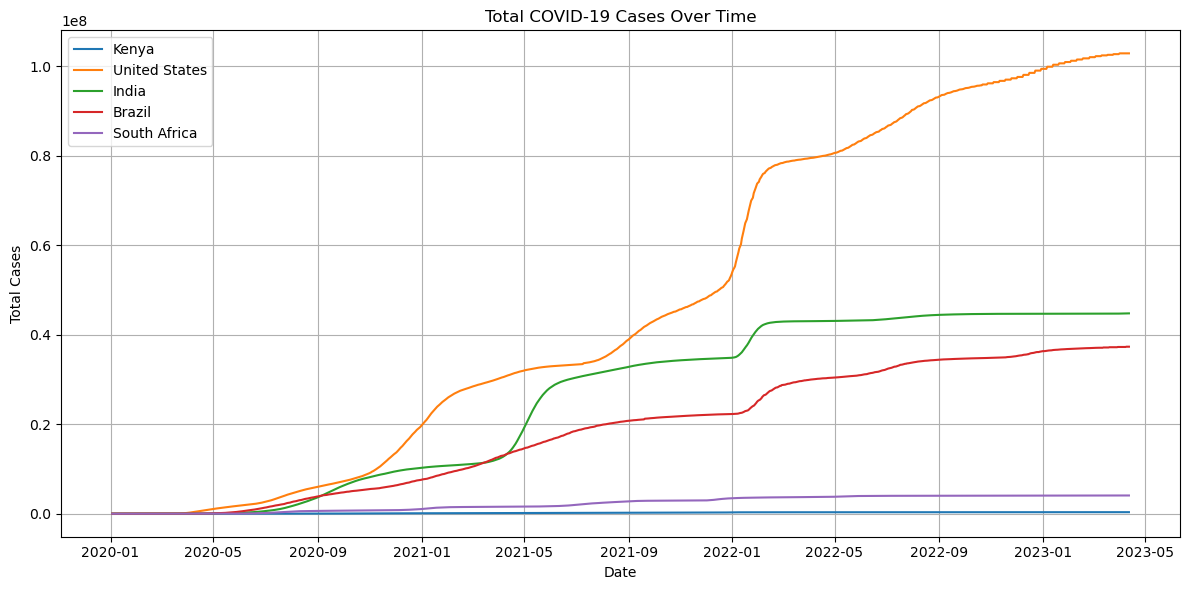

In [4]:
# Plotting  total Cases Over Time
plt.figure(figsize=(12, 6))
for country in countries:
    data = df[df['location'] == country]
    plt.plot(data['date'], data['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


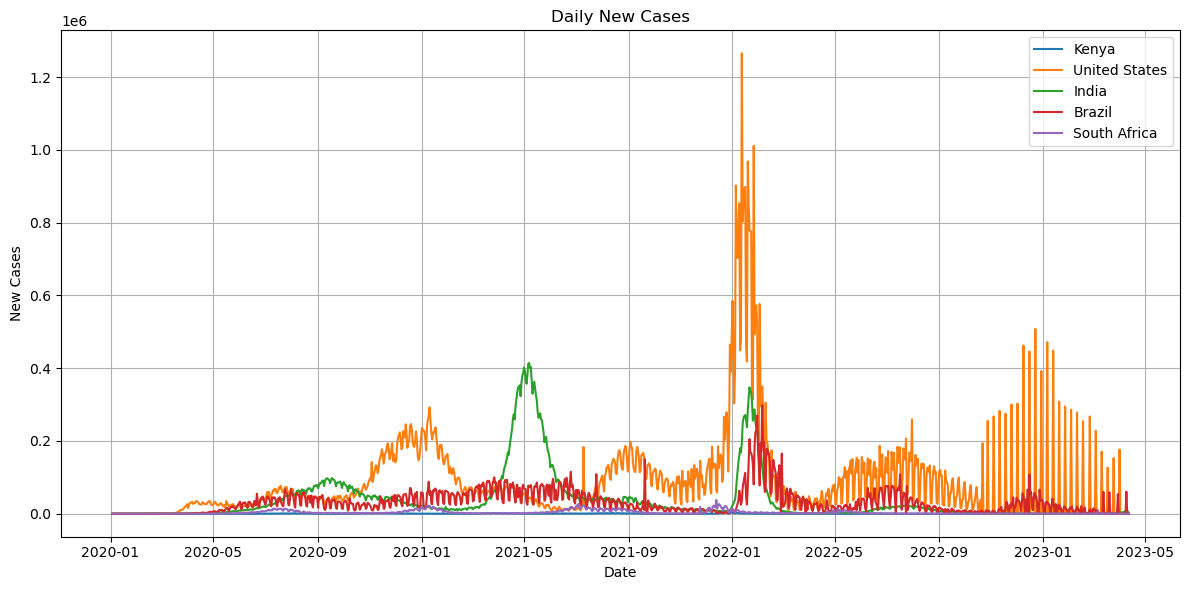

In [5]:
# Daily New Cases
plt.figure(figsize=(12, 6))
for country in countries:
    data = df[df['location'] == country]
    plt.plot(data['date'], data['new_cases'], label=country)
plt.title('Daily New Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


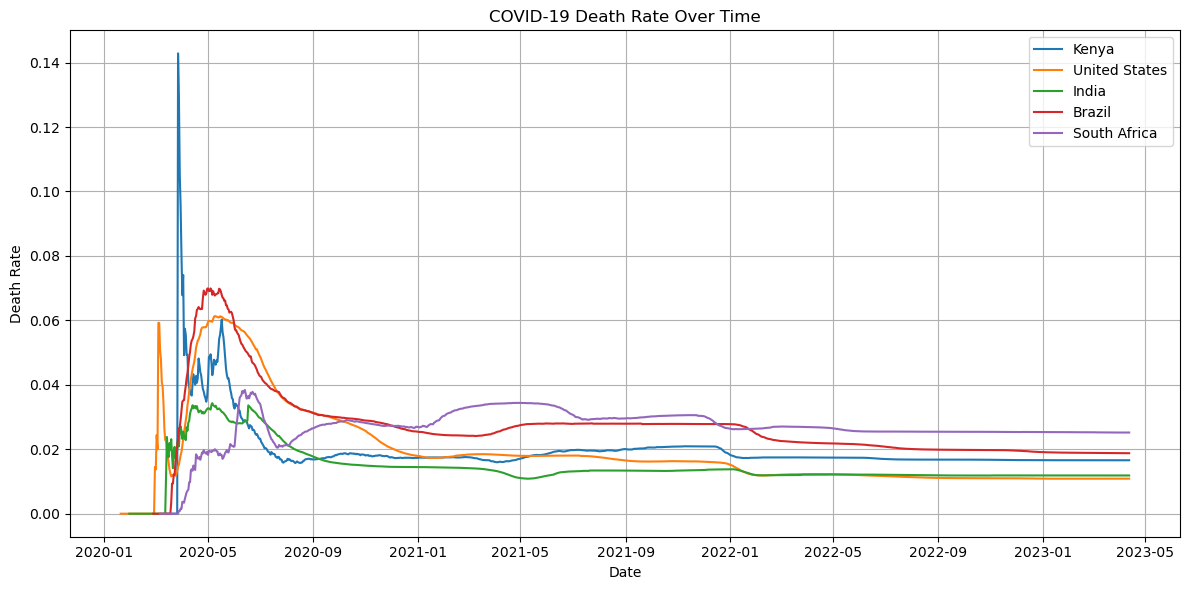

In [6]:
# Death Rate
df['death_rate'] = df['total_deaths'] / df['total_cases']
plt.figure(figsize=(12, 6))
for country in countries:
    data = df[df['location'] == country]
    plt.plot(data['date'], data['death_rate'], label=country)
plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


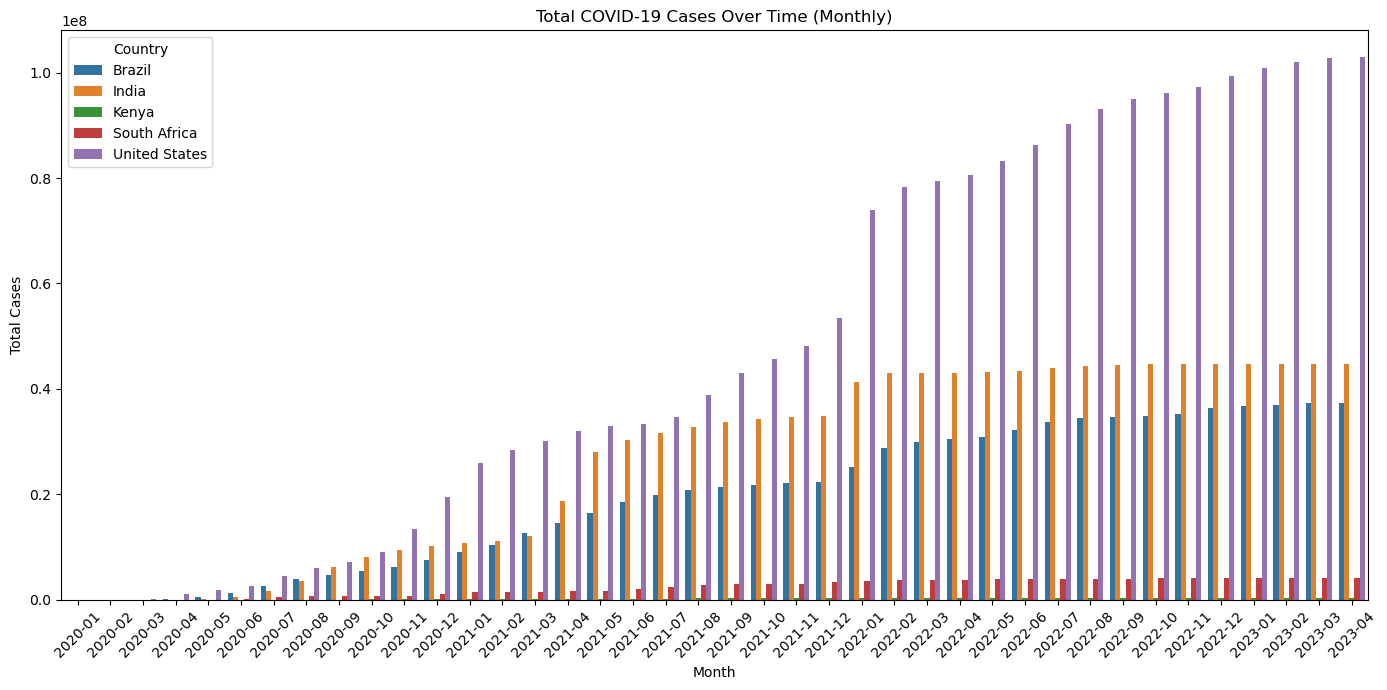

In [7]:
# Convert date to Month-Year format
df['month'] = df['date'].dt.to_period('M')

# Group by month and country
monthly_cases = df.groupby(['month', 'location'])['total_cases'].max().reset_index()

# Plot
plt.figure(figsize=(14, 7))
sns.barplot(data=monthly_cases, x='month', y='total_cases', hue='location')
plt.title('Total COVID-19 Cases Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()
plt.show()


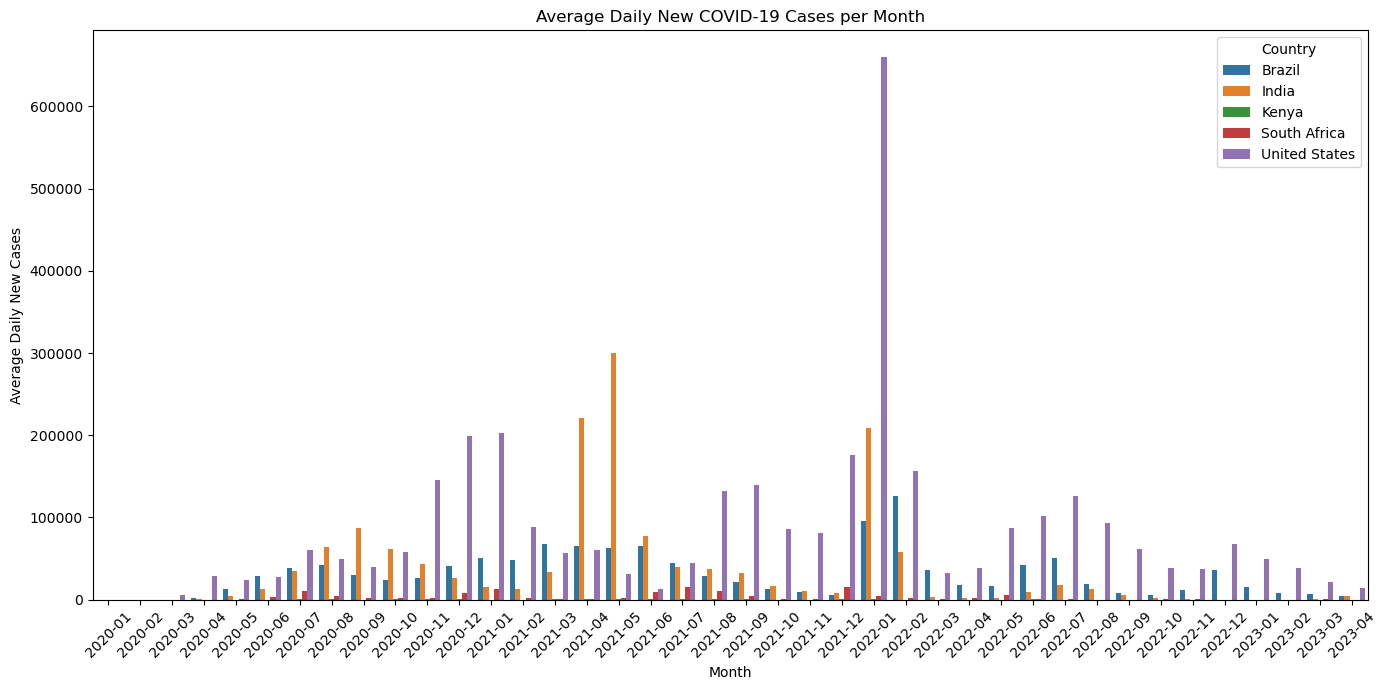

In [8]:
# Group by month and country for average daily new cases
monthly_new_cases = df.groupby(['month', 'location'])['new_cases'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(data=monthly_new_cases, x='month', y='new_cases', hue='location')
plt.title('Average Daily New COVID-19 Cases per Month')
plt.xlabel('Month')
plt.ylabel('Average Daily New Cases')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()
plt.show()


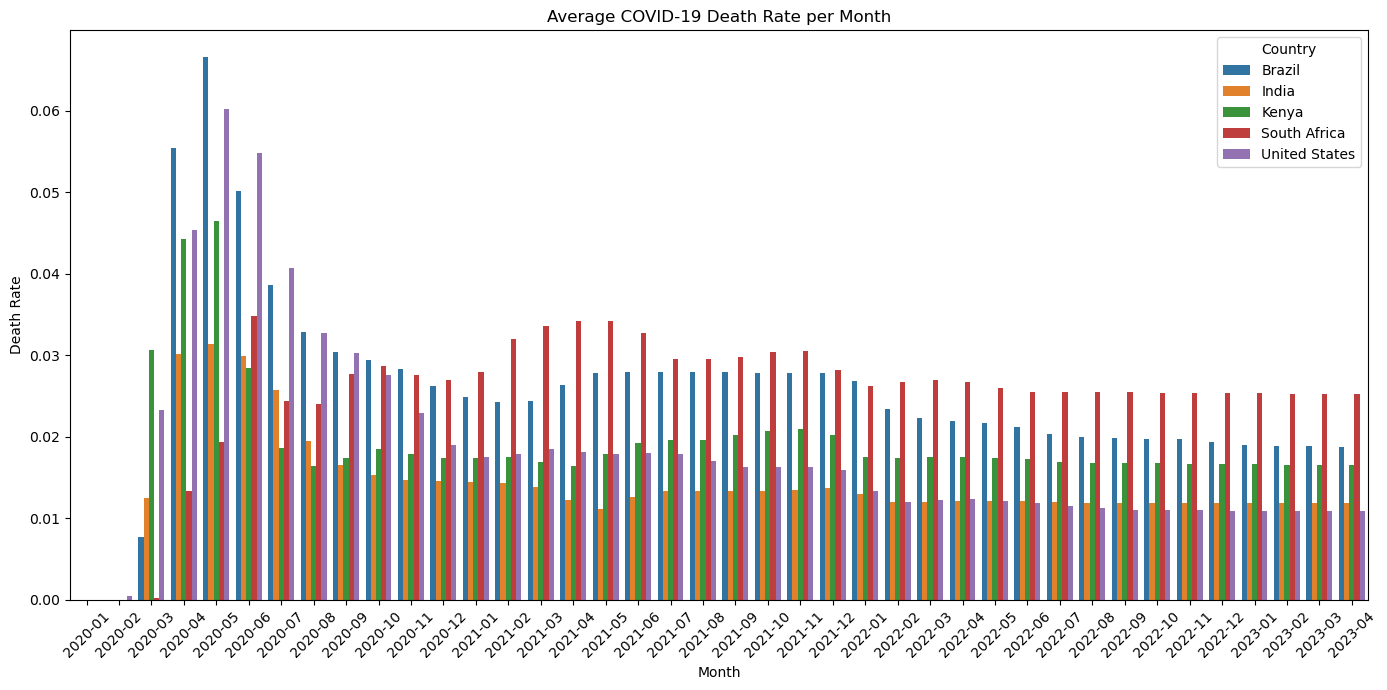

In [9]:
# Group by month and country for average death rate
monthly_death_rate = df.groupby(['month', 'location'])['death_rate'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(data=monthly_death_rate, x='month', y='death_rate', hue='location')
plt.title('Average COVID-19 Death Rate per Month')
plt.xlabel('Month')
plt.ylabel('Death Rate')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()
plt.show()


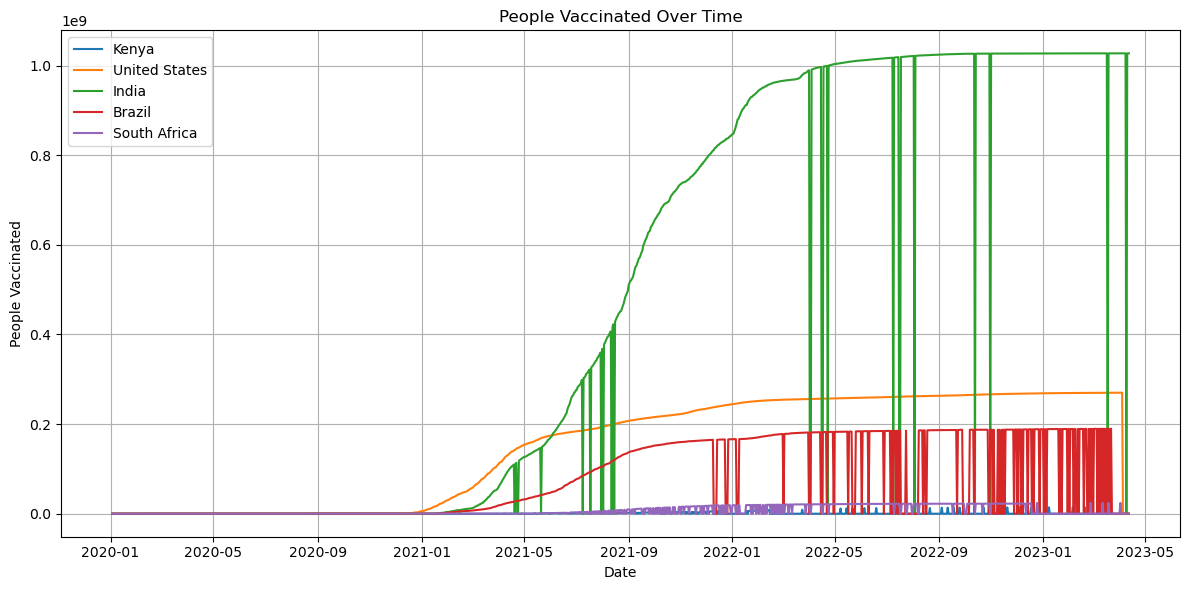

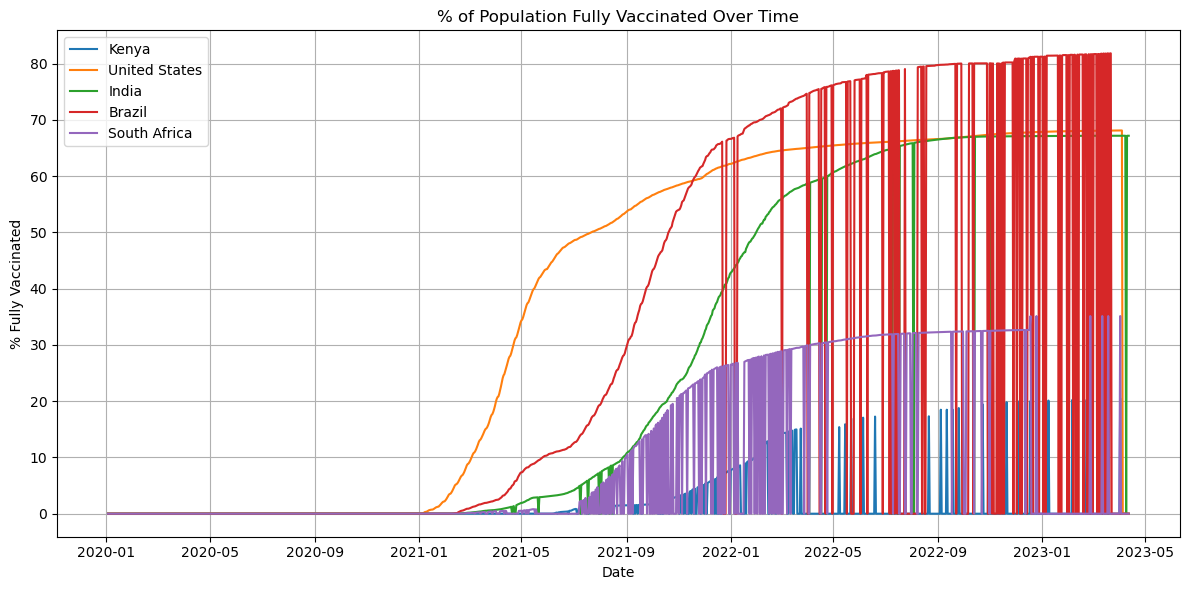

In [10]:
# 💉 People Vaccinated Over Time
plt.figure(figsize=(12, 6))
for country in countries:
    data = df[df['location'] == country]
    plt.plot(data['date'], data['people_vaccinated'], label=country)
plt.title('People Vaccinated Over Time')
plt.xlabel('Date')
plt.ylabel('People Vaccinated')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 💉 % Fully Vaccinated
df['pct_fully_vaccinated'] = (df['people_fully_vaccinated'] / df['population']) * 100
plt.figure(figsize=(12, 6))
for country in countries:
    data = df[df['location'] == country]
    plt.plot(data['date'], data['pct_fully_vaccinated'], label=country)
plt.title('% of Population Fully Vaccinated Over Time')
plt.xlabel('Date')
plt.ylabel('% Fully Vaccinated')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


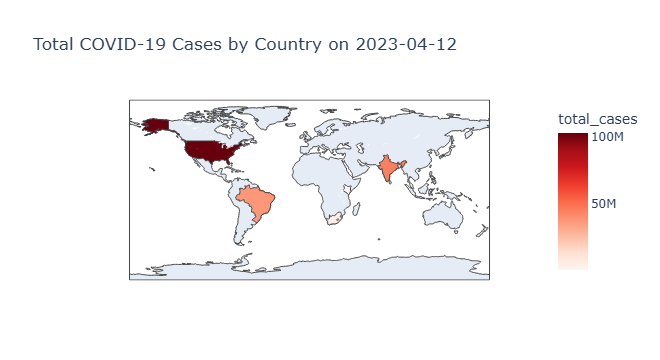

In [11]:
# 🌍 Choropleth Map (Latest Snapshot)
latest_date = df['date'].max()
latest_data = df[df['date'] == latest_date]

fig = px.choropleth(latest_data,
                    locations="iso_code",
                    color="total_cases",
                    hover_name="location",
                    color_continuous_scale="Reds",
                    title=f"Total COVID-19 Cases by Country on {latest_date.date()}")
fig.show()


In [ ]:
KEY INSIGHTS 
The United States has consistently reported the highest number of total cases.
India and Brazil followed closely in both total cases and daily new infections.
Kenya and South Africa show slower vaccination progress compared to developed nations.
The death rate peaked early in the pandemic and declined as vaccination efforts expanded.
